In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
data = pd.read_csv('ICPSR_31401/DS0001/31401-0001-Data.csv')

In [3]:
data = data.replace(' ', np.nan)


In [4]:
data = data.drop(data[(data.q601a01 == 8) | (data.q601a01 == 9) | 
                                                    (data.q601b01 == 8) | (data.q601b01 == 9) |
                                                    (data.q601c01 == 8) | (data.q601c01 == 9) |
                                                    (data.q601d01 == 8) | (data.q601d01 == 9) |
                                                    (data.q601e01 == 8) | (data.q601e01 == 9) |
                                                    (data.q601f01 == 8) | (data.q601f01 == 9) |
                                                    (data.q601g01 == 8) | (data.q601g01 == 9) ].index)

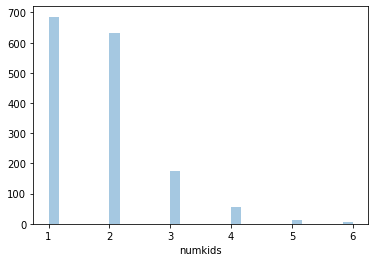

In [5]:
sb.distplot(data['numkids'],hist = True, kde=False, rug=False)


In [6]:
data_with_bp = data[['unique_id','numkids','q601a01','q601b01','q601c01','q601d01','q601e01', 'q601f01','q601g01']]

In [7]:
data_with_bp

,unique_id,numkids,q601a01,q601b01,q601c01,q601d01,q601e01,q601f01,q601g01
0,101,1,0,0,0,0,0,0,0
1,102,3,0,0,0,0,0,0,0
2,103,1,0,0,0,0,0,0,0
3,104,2,0,0,0,0,0,0,0
4,105,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1570,1671,2,0,0,0,0,0,0,0
1571,1672,1,0,0,0,0,0,0,0
1572,1673,1,0,0,0,0,0,0,0
1573,1674,1,0,0,0,0,0,0,0


In [8]:
data_with_bp_1 = data_with_bp.query('q601a01 > 0 or q601b01 > 0 or q601c01 > 0 or q601d01 > 0 or q601e01 > 0 or q601f01 > 0 or q601g01 > 0')

print(data_with_bp_1.shape)


(285, 9)


In [9]:
print('Out of', data.shape[0], 'families,',data_with_bp_1.shape[0], 'families had at least one kid with some behavior problem')

Out of 1566 families, 285 families had at least one kid with some behavior problem


In [10]:
# data_with_bp_more_1 = data_with_bp_1.query('numkids > 1')
# data_with_bp_more_1.shape

In [11]:
data_more_1kid_all = data[data.index.isin(data_with_bp_1.index)]

In [12]:
data_more_1kid_all.shape

(285, 457)

In [13]:
dataADpre = data.loc[data['q601b01'] > 0]
dataADpre[['unique_id','q601b01','q601b02','q601b03','q601b04','q601b05','q601b06']]

,unique_id,q601b01,q601b02,q601b03,q601b04,q601b05,q601b06
18,119,3,NaN,NaN,NaN,NaN,NaN
29,130,1,NaN,NaN,NaN,NaN,NaN
68,169,2,NaN,NaN,NaN,NaN,NaN
70,171,1,NaN,NaN,NaN,NaN,NaN
84,185,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1386,1487,1,NaN,NaN,NaN,NaN,NaN
1451,1552,4,NaN,NaN,NaN,NaN,NaN
1466,1567,1,NaN,NaN,NaN,NaN,NaN
1531,1632,1,NaN,NaN,NaN,NaN,NaN


In [14]:
dataADpre = data.loc[data['q601c01'] > 0]
dataADpre[['unique_id','q601c01','q601c02','q601c03','q601c04','q601c05','q601c06']]

,unique_id,q601c01,q601c02,q601c03,q601c04,q601c05,q601c06
95,196,1,NaN,NaN,NaN,NaN,NaN
112,213,1,NaN,NaN,NaN,NaN,NaN
150,251,5,NaN,NaN,NaN,NaN,NaN
178,279,2,NaN,NaN,NaN,NaN,NaN
194,295,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1450,1551,2,NaN,NaN,NaN,NaN,NaN
1462,1563,1,NaN,NaN,NaN,NaN,NaN
1466,1567,1,NaN,NaN,NaN,NaN,NaN
1552,1653,1,NaN,NaN,NaN,NaN,NaN


In [15]:
data = data.reindex(data.index.repeat(data.numkids))
data = data.reset_index(drop=True)
data['Child#'] = 0

n = 0
while n < data.shape[0]:
    for i in range(1, (list(data.loc[n, ['numkids']])[0]) + 1):
        data.loc[n + i - 1, ['Child#']] = i
    n += i

data.shape

(2792, 458)

In [16]:
data['has_problem'] = 0

for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
    for n in range(data.shape[0]):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            data.loc[n, ['has_problem']] = 1
            
            
    
data.loc[data['q601a01'] == 7, 'has_problem'] = 1

data['type'] = np.nan
data.loc[data['has_problem'] == 1, 'type'] = 'ADHD'



data.shape

(2792, 460)

In [17]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601a01','q601a02','q601a03','q601a04','q601a05','q601a06','Child#','has_problem','type']]

,unique_id,q601a01,q601a02,q601a03,q601a04,q601a05,q601a06,Child#,has_problem,type
32,119,3,4.0,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,4.0,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,4.0,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,4.0,NaN,NaN,NaN,NaN,4,1,ADHD


In [18]:
data_org = data.copy()
m = data_org.shape[0] + 1
lenght = data_org.shape[0]


for col in ['q601b01','q601b02','q601b03','q601b04','q601b05','q601b06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'AD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'AD'
                

                
for n in range(lenght):
    if list(data.loc[n, ['q601b01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'AD'
            m +=  1

            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'AD'
    


data.shape

(2836, 460)

In [19]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601b01','q601b02','q601b03','q601b04','q601b05','q601b06','Child#','has_problem','type']]

,unique_id,q601b01,q601b02,q601b03,q601b04,q601b05,q601b06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD


In [20]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601c01','q601c02','q601c03','q601c04','q601c05','q601c06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Aggresive'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Aggresive'


                
for n in range(lenght):
    if list(data.loc[n, ['q601c01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Aggresive'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Aggresive'
    

data.shape

(2880, 460)

In [21]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601c01','q601c02','q601c03','q601c04','q601c05','q601c06','Child#','has_problem','type']]

,unique_id,q601c01,q601c02,q601c03,q601c04,q601c05,q601c06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD


In [22]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601d01','q601d02','q601d03','q601d04','q601d05','q601d06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'PDD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'PDD'


                
for n in range(lenght):
    if list(data.loc[n, ['q601d01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'PDD'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'PDD'
    


data.shape

(2913, 460)

In [23]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601d01','q601d02','q601d03','q601d04','q601d05','q601d06','Child#','has_problem','type']]

,unique_id,q601d01,q601d02,q601d03,q601d04,q601d05,q601d06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD


In [24]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601e01','q601e02','q601e03','q601e04','q601e05','q601e06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]: 
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'AS'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'AS'


                
for n in range(lenght):
    if list(data.loc[n, ['q601e01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'AS'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'AS'



data.shape

(2946, 460)

In [25]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601e01','q601e02','q601e03','q601e04','q601e05','q601e06','Child#','has_problem','type']]

,unique_id,q601e01,q601e02,q601e03,q601e04,q601e05,q601e06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AS


In [26]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601f01','q601f02','q601f03','q601f04','q601f05','q601f06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'ASD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'ASD'


                
for n in range(lenght):
    if list(data.loc[n, ['q601f01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'ASD'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'ASD'
    

data.shape

(3019, 460)

In [27]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601f01','q601f02','q601f03','q601f04','q601f05','q601f06','Child#','has_problem','type']]

,unique_id,q601f01,q601f02,q601f03,q601f04,q601f05,q601f06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ASD


In [28]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601g01','q601g02','q601g03','q601g04','q601g05','q601g06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Behavior'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Behavior'


                
for n in range(lenght):
    if list(data.loc[n, ['q601g01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Behavior'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Behavior'
    

data.shape

(3119, 460)

In [29]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601g01','q601g02','q601g03','q601g04','q601g05','q601g06','Child#','has_problem','type']]

,unique_id,q601g01,q601g02,q601g03,q601g04,q601g05,q601g06,Child#,has_problem,type
32,119,3,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,3,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,3,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,3,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,3,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,3,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,3,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [30]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601h01','q601h02','q601h03','q601h04','q601h05','q601h06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Asthma'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Asthma'


                
for n in range(lenght):
    if list(data.loc[n, ['q601h01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Asthma'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Asthma'
    
data.shape

(3182, 460)

In [31]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601h01','q601h02','q601h03','q601h04','q601h05','q601h06','Child#','has_problem','type']]

,unique_id,q601h01,q601h02,q601h03,q601h04,q601h05,q601h06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,0,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,0,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [32]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601i01','q601i02','q601i03','q601i04','q601i05','q601i06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Heart'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Heart'


                
for n in range(lenght):
    if list(data.loc[n, ['q601i01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Heart'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Heart'
    

data.shape

(3197, 460)

In [33]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601i01','q601i02','q601i03','q601i04','q601i05','q601i06','Child#','has_problem','type']]

,unique_id,q601i01,q601i02,q601i03,q601i04,q601i05,q601i06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,0,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,0,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [34]:
m = data.shape[0] + 1
lenght = data_org.shape[0]


for col in ['q601j01','q601j02','q601j03','q601j04','q601j05','q601j06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Chornic condition'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Chornic condition'


                
for n in range(lenght):
    if list(data.loc[n, ['q601j01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Chornic condition'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Chornic condition'
    

data.shape

(3285, 460)

In [35]:
data119 = data.loc[data['unique_id'] == 119]

data119[['unique_id','q601j01','q601j02','q601j03','q601j04','q601j05','q601j06','Child#','has_problem','type']]

,unique_id,q601j01,q601j02,q601j03,q601j04,q601j05,q601j06,Child#,has_problem,type
32,119,0,NaN,NaN,NaN,NaN,NaN,1,0,NaN
33,119,0,NaN,NaN,NaN,NaN,NaN,2,0,NaN
34,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ADHD
35,119,0,NaN,NaN,NaN,NaN,NaN,4,1,ADHD
2793,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AD
2881,119,0,NaN,NaN,NaN,NaN,NaN,3,1,PDD
2914,119,0,NaN,NaN,NaN,NaN,NaN,3,1,AS
2947,119,0,NaN,NaN,NaN,NaN,NaN,3,1,ASD
3021,119,0,NaN,NaN,NaN,NaN,NaN,3,1,Behavior


In [36]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60201','q60202','q60203','q60204','q60205','q60206']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Special needs'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Special needs'


                
for n in range(lenght):
    if list(data.loc[n, ['q60201']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Special needs'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Special needs'
    

data.shape

(3448, 460)

In [ ]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60301','q60302','q60303','q60304','q60305','q60306']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Attention problems'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Attention problems'


                
for n in range(lenght):
    if list(data.loc[n, ['q60301']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Attention problems'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Attention problems'
    
data.shape

In [ ]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60401','q60402','q60403','q60404','q60405','q60406']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'More medical'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'More medical'


                
for n in range(lenght):
    if list(data.loc[n, ['q60401']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'More medical'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'More medical'
    

data.shape

In [ ]:
data.loc[data['unique_id'] == 119]

In [ ]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60501','q60502','q60503','q60504','q60505','q60506']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Limited ability'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Limited ability'


                
for n in range(lenght):
    if list(data.loc[n, ['q60501']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Limited ability'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Limited ability'
    

data.shape

In [ ]:
m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60601','q60602','q60603','q60604','q60605','q60606']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'PT/OT'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'PT/OT'


                
for n in range(lenght):
    if list(data.loc[n, ['q60601']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'PT/OT'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'PT/OT'
    

data.shape

In [ ]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60701','q60702','q60703','q60704','q60705','q60706']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'IEP'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'IEP'


                
for n in range(lenght):
    if list(data.loc[n, ['q60701']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'IEP'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'IEP'
    


data.shape

In [ ]:
m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60801','q60802','q60803','q60804','q60805','q60806']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'IFSP'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'IFSP'


                
for n in range(lenght):
    if list(data.loc[n, ['q60801']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'IFSP'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'IFSP'
    

data.shape

In [ ]:
# data = data.sort_values(['unique_id'])
# data = data.reset_index(drop=True)

data.drop(['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06'], axis=1, inplace=True)
data.drop(['q601b01','q601b02','q601b03','q601b04','q601b05','q601b06'], axis=1, inplace=True)
data.drop(['q601c01','q601c02','q601c03','q601c04','q601c05','q601c06'], axis=1, inplace=True)
data.drop(['q601d01','q601d02','q601d03','q601d04','q601d05','q601d06'], axis=1, inplace=True)
data.drop(['q601e01','q601e02','q601e03','q601e04','q601e05','q601e06'], axis=1, inplace=True)
data.drop(['q601f01','q601f02','q601f03','q601f04','q601f05','q601f06'], axis=1, inplace=True)
data.drop(['q601g01','q601g02','q601g03','q601g04','q601g05','q601g06'], axis=1, inplace=True)
data.drop(['q601h01','q601h02','q601h03','q601h04','q601h05','q601h06'], axis=1, inplace=True)
data.drop(['q601i01','q601i02','q601i03','q601i04','q601i05','q601i06'], axis=1, inplace=True)
data.drop(['q601j01','q601j02','q601j03','q601j04','q601j05','q601j06'], axis=1, inplace=True)
data.drop(['q60201','q60202','q60203','q60204','q60205','q60206'], axis=1, inplace=True)

data.drop(['q60801','q60802','q60803','q60804','q60805','q60806'], axis=1, inplace=True)

data.drop(['q60701','q60702','q60703','q60704','q60705','q60706'], axis=1, inplace=True)

data.drop(['q60601','q60602','q60603','q60604','q60605','q60606'], axis=1, inplace=True)

data.drop(['q60501','q60502','q60503','q60504','q60505','q60506'], axis=1, inplace=True)

data.drop(['q60401','q60402','q60403','q60404','q60405','q60406'], axis=1, inplace=True)

data.drop(['q60301','q60302','q60303','q60304','q60305','q60306'], axis=1, inplace=True)


data.shape



In [ ]:
list_drop = ['year','month','day','sam_type','p3','q100', 'q100xlld','agecnt1','agecnt2','agecnt3','agecnt4',
                'q101a2a', 'q101b2a','q101c2a','q101d2a', 'q101e2a','q101f2a','q104', 'q609','q702_a01', 'q702_a02', 'q702_a03',
               'q702_a04', 'q702_a05','q702_a06','q800a','q800aage','q800b','q801','p4','q905'] + list(data.loc[:, 'WEIGHT_GEN_POP':'WEIGHT_AUT_ALL'].columns)+list(data.loc[:, 'q802a':'q806o'].columns)+ list(data.loc[:, 'q906':'q907f'].columns)

df = data.drop(list_drop, axis=1)


In [ ]:
df.loc[df['strata'] == '11','strata'] = 'NE low'
df.loc[df['strata'] == '12','strata'] = 'NE high'
df.loc[df['strata'] == '21','strata'] = 'MW low'
df.loc[df['strata'] == '22','strata'] = 'MW high'
df.loc[df['strata'] == '31','strata'] = 'S low'
df.loc[df['strata'] == '32','strata'] = 'S high'
df.loc[df['strata'] == '41','strata'] = 'W low'
df.loc[df['strata'] == '42','strata'] = 'W high'
df.loc[df['strata'] == '50','strata'] = 'Autistic child'







In [ ]:
%matplotlib inline
plt.figure(figsize=(23, 12))
sb.countplot(x = "type",hue = "strata", data=df);

In [ ]:
plt.figure(figsize=(23, 12))

sb.countplot(x = "type", data=df);

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df['child_age'] = 0
df['sex'] = np.nan

length = df.shape[0]
child = 1

for col in ['q101a1','q101b1','q101c1','q101d1','q101e1','q101f1']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['child_age']] = list(df.loc[n, [col]])[0]
            
    child += 1
            
child = 1
for col in ['q101a2','q101b2','q101c2','q101d2','q101e2','q101f2']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['sex']] = list(df.loc[n, [col]])[0]
            
    child += 1    
    
    
df.loc[df['sex'] == 1,'sex'] = 'male'
df.loc[df['sex'] == 2,'sex'] = 'female'    

In [ ]:
df.drop(['q101a1','q101b1','q101c1','q101d1','q101e1','q101f1','q101a2','q101b2','q101c2','q101d2','q101e2','q101f2'], axis=1, inplace=True)


In [ ]:


df.rename(columns={"q105": "two_parent_house", "q200": "regular_activity"}, inplace=True)

In [ ]:
df.loc[df['two_parent_house'] == 1,'two_parent_house'] = 'yes'
df.loc[df['two_parent_house'] == 2,'two_parent_house'] = 'no' 

df.loc[df['regular_activity'] == 1,'regular_activity'] = 'yes'
df.loc[df['regular_activity'] == 2,'regular_activity'] = 'no' 

In [ ]:
df

In [ ]:
df['child_care'] = np.nan
df_org = df.copy()




In [ ]:
for col in ['q301a01','q301a02','q301a03','q301a04','q301a05','q301a06']:
    for n in range(df.shape[0]):
        df[col] = pd.to_numeric(df[col])

        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            df.loc[m, ['child_care']] = 'parent_not_in_house'
            
            
    
data.loc[df['q301a01'] == 7, 'child_care'] = 'parent_not_in_house'

In [ ]:
df

In [ ]:
m = df.shape[0] + 1
length = df_org.shape[0]

for col in ['q301b01','q301b02','q301b03','q301b04','q301b05','q301b06']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
            if list(df.loc[n, ['child_care']])[0] != 'NaN':
                df.loc[m] = list(df.loc[n])
                df.loc[m, ['child_care']] = 'nanny'
                m += 1
                
            else: 
                df.loc[n, ['child_care']] = 'nanny'

                

                
for n in range(length):
    if list(df.loc[n, ['q301b01']])[0] == 7:
        if list(df.loc[n, ['child_care']])[0] != 'NaN': 
            df.loc[m] = list(df.loc[n])
            df.loc[m, ['child_care']] = 'nanny'

            m +=  1

            
        else: 
            df.loc[n, ['child_care']] = 'nanny'


    


df.shape

In [ ]:
# m = df.shape[0] + 1
# length = df_org.shape[0]

# for col in ['q301c01','q301c02','q301c03','q301c04','q301c05','q301c06']:
#     for n in range(length):
#         df[col] = pd.to_numeric(df[col])
#         if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
#             if list(df.loc[n, ['child_care']])[0] != 0:
#                 df.loc[m] = list(df.loc[n])
#                 df.loc[m, ['child_care']] = 'attending child care'
#                 m += 1
                
#             else: 
#                 df.loc[n, ['child_care']] = 'attending child care'

                

                
# for n in range(length):
#     if list(df.loc[n, ['q301c01']])[0] == 7:
#         if list(df.loc[n, ['child_care']])[0] != 0: 
#             df.loc[m] = list(df.loc[n])
#             df.loc[m, ['child_care']] = 'attending child care'

#             m +=  1

            
#         else: 
#             df.loc[n, ['child_care']] = 'attending child care'


    


# df.shape

In [ ]:
# df.loc[df['unique_id']==103]

In [ ]:
# df_103 = df.loc[df['unique_id']==103]
# df_103[['q301b01','q301b02','q301b03','q301b04','q301b05','q301b06','q301a01','q301a02','q301a03','q301a04','q301a05','q301a06', 'q301d01','q301d02','q301d03','q301d04','q301d05','q301d06']]

In [ ]:
# m = df.shape[0] + 1
# length = df_org.shape[0]

# for col in ['q301d01','q301d02','q301d03','q301d04','q301d05','q301d06']:
#     for n in range(length):
#         df[col] = pd.to_numeric(df[col])
#         if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            
#             if list(df.loc[n, ['child_care']])[0] != 0:
#                 df.loc[m] = list(df.loc[n])
#                 df.loc[m, ['child_care']] = 'family based child care'
#                 m += 1
                
#             else: 
#                 df.loc[n, ['child_care']] = 'family based child care'

                

                
# for n in range(length):
#     if list(df.loc[n, ['q301d01']])[0] == 7:
#         if list(df.loc[n, ['child_care']])[0] != 0: 
#             df.loc[m] = list(df.loc[n])
#             df.loc[m, ['child_care']] = 'family based child care'

#             m +=  1

            
#         else: 
#             df.loc[n, ['child_care']] = 'family based child care'


    


# df.shape

In [ ]:
df

In [ ]:
# data_more_1kid_ADHD = data_more_1kid_all[['unique_id','numkids','q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']]
# data_more_1kid_ADHD = data_more_1kid_ADHD.replace(np.nan, 0)


# data_more_1kid_ADHD['has_problem'] = data_more_1kid_ADHD['q601a01']

# n = 1
# for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
#     data_more_1kid_ADHD[col] = pd.to_numeric(data_more_1kid_ADHD[col])
#     data_more_1kid_ADHD.loc[data_more_1kid_ADHD[col] > 0.0, 'has_problem'] = n
#     n+=1
    
# data_more_1kid_ADHD.loc[data_more_1kid_ADHD['q601a01'] == 7, 'has_problem'] = data_more_1kid_ADHD['numkids']



In [ ]:
# data_more_1kid_ADHD_ = data_more_1kid_ADHD[['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']]
# col_count = data_more_1kid_ADHD_.count(axis = 1)
# data_more_1kid_ADHD['total_count'] = col_count

# data_more_1kid_ADHD.loc[data_more_1kid_ADHD['q601a01'] == 7, 'total_count'] = data_more_1kid_ADHD['numkids']
# data['ADHD_count'] = data_more_1kid_ADHD['total_count']


In [ ]:
# data['has_problem'] = data['q601a01']

# n = 1
# for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
#     data[col] = pd.to_numeric(data[col])
#     data.loc[data[col] > 0.0, 'has_problem'] = n
#     n+=1
    
# data.loc[data['q601a01'] == 7, 'has_problem'] = data['numkids']
# data_more_1kid_ADHD0 = data[data['has_problem'] == 0]
# data_more_1kid_ADHD1 = data.reindex(data.index.repeat(data.has_problem))
# data_more_1kid_ADHD1['has_problem'] = 1
# data = pd.concat([data_more_1kid_ADHD0, data_more_1kid_ADHD1])
# data = data.sort_index()
# data['type'] = np.nan
# data.loc[data['has_problem'] == 1, 'type'] = 'ADHD'


# data['ADHD'] = 0

# for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
#     for n in range(data.shape[0]):
#         if list(data.loc[n, [col]])[0] > 0:
#             data.loc[n, ['ADHD']] = int(list(data.loc[n, [col]])[0])
        
# data.drop(['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06'], axis=1, inplace=True)

# data